In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import networkx as nx
from pyvis.network import Network

In [3]:
json_file = open('../../../go/dev/alice/graph')
data = json.load(json_file)

In [4]:
len(data["edges"])

35058

In [5]:
len(data["nodes"])

6216

In [23]:
data["edges"][4644]

{'channel_id': '598133226060185601',
 'chan_point': '3d3b261f7f6e8608e417de96996ba227fe0e6e3ddc5a8e92aa1c50cd0fd483e6:1',
 'last_update': 1573703058,
 'node1_pub': '0217890e3aad8d35bc054f43acc00084b25229ecff0ab68debd82883ad65ee8266',
 'node2_pub': '02445ff6a24e69242d6f6f38e1b7e8ae9c01eb9b660f3daf3304cb4b7cfeb79a99',
 'capacity': '2000000',
 'node1_policy': {'time_lock_delta': 144,
  'min_htlc': '1000',
  'fee_base_msat': '1000',
  'fee_rate_milli_msat': '1',
  'disabled': False,
  'max_htlc_msat': '2000000000',
  'last_update': 1573703058},
 'node2_policy': {'time_lock_delta': 144,
  'min_htlc': '1000',
  'fee_base_msat': '0',
  'fee_rate_milli_msat': '1',
  'disabled': False,
  'max_htlc_msat': '2000000000',
  'last_update': 1573698928},
 'btc1_pub': '02707d359e2feb3c864d4721108bfe5bb241d7fb8369e8072043085871eec79d37',
 'btc2_pub': '039d3faa25651cf6f09afc01520f9e464952b94a22624c23439e05a6fb7838b51a'}

In [11]:
data["nodes"][0]

{'last_update': 1573030306,
 'pub_key': '0200072fd301cb4a680f26d87c28b705ccd6a1d5b00f1b5efd7fe5f998f1bbb1f1',
 'alias': 'OutaSpace 🚀',
 'addresses': [{'network': 'tcp', 'addr': '46.163.78.93:9760'},
  {'network': 'tcp', 'addr': '[2a01:488:66:1000:2ea3:4e5d:0:1]:9760'},
  {'network': 'tcp', 'addr': '2dkobxxunnjatyph.onion:9760'},
  {'network': 'tcp',
   'addr': 'nzslu33ecbokyn32teza2peiiiuye43ftom7jvnuhsxdbg3vhw7w3aqd.onion:9760'}],
 'color': '#123456'}

In [9]:
node_connections = []
btc_key_connections = []
nodes = []

for edge in data["edges"]:    
    if edge["node1_pub"] not in nodes:
        nodes.append(edge["node1_pub"])
        
    if edge["node2_pub"] not in nodes:
        nodes.append(edge["node2_pub"])
    
    btc_key_connections.append((edge["btc1_pub"], edge["btc2_pub"], {'weight': edge["capacity"]}))
    node_connections.append((edge["node1_pub"], edge["node2_pub"], {'weight': edge["capacity"]}))

In [11]:
G = nx.Graph()

In [12]:
G.add_edges_from(edges)

In [15]:
nx.degree_centrality(G)

{'03bd3466efd4a7306b539e2314e69efc6b1eaee29734fcedd78cf81b1dde9fedf8': 0.000525670229542667,
 '03c3d14714b78f03fd6ea4997c2b540a4139258249ea1d625c03b68bb82f85d0ea': 0.00017522340984755565,
 '02eccebd9ed98f6d267080a58194dbe554a2b33d976eb95bb7c116d00fd64c4a13': 0.002978797967408446,
 '02ee4469f2b686d5d02422917ac199602ce4c366a7bfaac1099e3ade377677064d': 0.002102680918170668,
 '03cbf298b068300be33f06c947b9d3f00a0f0e8089da3233f5db37e81d3a596fe1': 0.012265638689328895,
 '022e74ed3ddd3f590fd6492e60b20dcad7303f17e1ffd882fb33bb3f6c88f64398': 0.0003504468196951113,
 '035f1498c929d4cefba4701ae36a554691f526ff60b1766badd5a49b3c8b68e1d8': 0.008936393902225339,
 '02f6725f9c1c40333b67faea92fd211c183050f28df32cac3f9d69685fe9665432': 0.0038549150166462243,
 '03a315ef609658cecfedca712ddad3a7ef5caad73911cb0cd0c73fefa5af347f5a': 0.00017522340984755565,
 '0269ba746a03bb9b8225c4e78a85b5b8674a5b45ac425860944922460e94241932': 0.00017522340984755565,
 '02c0ac82c33971de096d87ce5ed9b022c2de678f08002dc37fdb1b6886d1

In [16]:
nx.closeness_centrality(G)

{'03bd3466efd4a7306b539e2314e69efc6b1eaee29734fcedd78cf81b1dde9fedf8': 0.21917211371427864,
 '03c3d14714b78f03fd6ea4997c2b540a4139258249ea1d625c03b68bb82f85d0ea': 0.17934771318749249,
 '02eccebd9ed98f6d267080a58194dbe554a2b33d976eb95bb7c116d00fd64c4a13': 0.2702248945780043,
 '02ee4469f2b686d5d02422917ac199602ce4c366a7bfaac1099e3ade377677064d': 0.2716380251053415,
 '03cbf298b068300be33f06c947b9d3f00a0f0e8089da3233f5db37e81d3a596fe1': 0.28167370928848534,
 '022e74ed3ddd3f590fd6492e60b20dcad7303f17e1ffd882fb33bb3f6c88f64398': 0.21352230624972693,
 '035f1498c929d4cefba4701ae36a554691f526ff60b1766badd5a49b3c8b68e1d8': 0.24869057370264408,
 '02f6725f9c1c40333b67faea92fd211c183050f28df32cac3f9d69685fe9665432': 0.24885759969913102,
 '03a315ef609658cecfedca712ddad3a7ef5caad73911cb0cd0c73fefa5af347f5a': 0.1987479217479132,
 '0269ba746a03bb9b8225c4e78a85b5b8674a5b45ac425860944922460e94241932': 0.17934771318749249,
 '02c0ac82c33971de096d87ce5ed9b022c2de678f08002dc37fdb1b6886d12234b5': 0.3561213322

In [17]:
nx.betweenness_centrality(G)

{'03bd3466efd4a7306b539e2314e69efc6b1eaee29734fcedd78cf81b1dde9fedf8': 0.0006916196348732297,
 '03c3d14714b78f03fd6ea4997c2b540a4139258249ea1d625c03b68bb82f85d0ea': 0.0,
 '02eccebd9ed98f6d267080a58194dbe554a2b33d976eb95bb7c116d00fd64c4a13': 0.0019433508211799974,
 '02ee4469f2b686d5d02422917ac199602ce4c366a7bfaac1099e3ade377677064d': 0.0004985966354017188,
 '03cbf298b068300be33f06c947b9d3f00a0f0e8089da3233f5db37e81d3a596fe1': 0.015535816061546878,
 '022e74ed3ddd3f590fd6492e60b20dcad7303f17e1ffd882fb33bb3f6c88f64398': 0.0,
 '035f1498c929d4cefba4701ae36a554691f526ff60b1766badd5a49b3c8b68e1d8': 0.007252894366944516,
 '02f6725f9c1c40333b67faea92fd211c183050f28df32cac3f9d69685fe9665432': 0.003447841889532841,
 '03a315ef609658cecfedca712ddad3a7ef5caad73911cb0cd0c73fefa5af347f5a': 0.0,
 '0269ba746a03bb9b8225c4e78a85b5b8674a5b45ac425860944922460e94241932': 0.0,
 '02c0ac82c33971de096d87ce5ed9b022c2de678f08002dc37fdb1b6886d12234b5': 0.006333796039322554,
 '03b7ca940bc33b882dc1f1bee353a6cf205b1a74

In [18]:
nx.subgraph_centrality(G)

{'03bd3466efd4a7306b539e2314e69efc6b1eaee29734fcedd78cf81b1dde9fedf8': 2.292676881492709e+25,
 '03c3d14714b78f03fd6ea4997c2b540a4139258249ea1d625c03b68bb82f85d0ea': 3.258340931976393e+21,
 '02eccebd9ed98f6d267080a58194dbe554a2b33d976eb95bb7c116d00fd64c4a13': 1.4486256713183088e+28,
 '02ee4469f2b686d5d02422917ac199602ce4c366a7bfaac1099e3ade377677064d': 1.4058170891865028e+28,
 '03cbf298b068300be33f06c947b9d3f00a0f0e8089da3233f5db37e81d3a596fe1': 1.6122866433565317e+29,
 '022e74ed3ddd3f590fd6492e60b20dcad7303f17e1ffd882fb33bb3f6c88f64398': 8.112983373594465e+24,
 '035f1498c929d4cefba4701ae36a554691f526ff60b1766badd5a49b3c8b68e1d8': 2.179978075622096e+27,
 '02f6725f9c1c40333b67faea92fd211c183050f28df32cac3f9d69685fe9665432': 2.3759473986660986e+27,
 '03a315ef609658cecfedca712ddad3a7ef5caad73911cb0cd0c73fefa5af347f5a': 3.376684584274141e+23,
 '0269ba746a03bb9b8225c4e78a85b5b8674a5b45ac425860944922460e94241932': 3.258340938519142e+21,
 '02c0ac82c33971de096d87ce5ed9b022c2de678f08002dc37fdb1b

In [19]:
nx.eigenvector_centrality(G)

{'03bd3466efd4a7306b539e2314e69efc6b1eaee29734fcedd78cf81b1dde9fedf8': 2.9192053945065937e-06,
 '03c3d14714b78f03fd6ea4997c2b540a4139258249ea1d625c03b68bb82f85d0ea': 3.480285234271419e-08,
 '02eccebd9ed98f6d267080a58194dbe554a2b33d976eb95bb7c116d00fd64c4a13': 7.336819297090391e-05,
 '02ee4469f2b686d5d02422917ac199602ce4c366a7bfaac1099e3ade377677064d': 7.227454231353995e-05,
 '03cbf298b068300be33f06c947b9d3f00a0f0e8089da3233f5db37e81d3a596fe1': 0.000244791799969072,
 '022e74ed3ddd3f590fd6492e60b20dcad7303f17e1ffd882fb33bb3f6c88f64398': 1.7369650956697803e-06,
 '035f1498c929d4cefba4701ae36a554691f526ff60b1766badd5a49b3c8b68e1d8': 2.8466127561335303e-05,
 '02f6725f9c1c40333b67faea92fd211c183050f28df32cac3f9d69685fe9665432': 2.9719765093723956e-05,
 '03a315ef609658cecfedca712ddad3a7ef5caad73911cb0cd0c73fefa5af347f5a': 3.542060005724591e-07,
 '0269ba746a03bb9b8225c4e78a85b5b8674a5b45ac425860944922460e94241932': 3.480285234271419e-08,
 '02c0ac82c33971de096d87ce5ed9b022c2de678f08002dc37fdb1b6

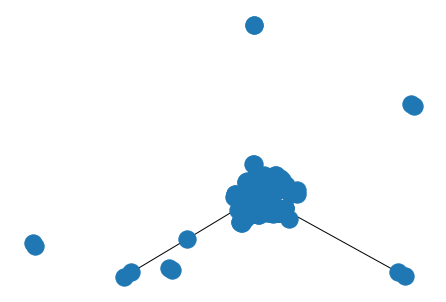

In [141]:
nx.draw(G, with_labels=False)

In [154]:
g=Network(height=800, width=800, notebook=True)

In [155]:
g.add_nodes(nodes)
g.add_edges(edges)

In [156]:
g.show("graph.html")